In [68]:
import os
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/commit.csv')
pr_df = pd.read_csv('C:/Users/Admin/Downloads/pr.csv')
issue_df = pd.read_csv('C:/Users/Admin/Downloads/issue.csv')
files_df = pd.read_csv('C:/Users/Admin/Downloads/file_data.csv')
language_df = pd.read_csv('C:/Users/Admin/Downloads/languages.csv')

In [69]:
pr_df

Author         Reviewer Pr_state           Created_at  \
0     richard-salam              NaN     open  2024-06-13 13:31:14   
1          waclaw66  michelheusschen     open  2024-06-13 12:48:13   
2       zackpollard          jrasm91   closed  2024-06-13 12:38:18   
3      alextran1502          jrasm91     open  2024-06-13 12:33:47   
4       zackpollard           bo0tzz   closed  2024-06-13 11:13:55   
...             ...              ...      ...                  ...   
4413   alextran1502              NaN   closed  2022-02-08 17:24:07   
4414   alextran1502              NaN   closed  2022-02-08 05:42:11   
4415   alextran1502              NaN   closed  2022-02-07 02:28:28   
4416        schklom              NaN   closed  2022-02-06 18:08:06   
4417   alextran1502              NaN   closed  2022-02-06 06:07:43   

               Updated_at  Additions  Commits            Merged_at  
0     2024-06-13 13:31:29          8        1                  NaN  
1     2024-06-13 13:41:07        102        1                  NaN  
2     2024-06-13 12:44:07          0        1  2024-06-13 12:44:06  
3     2024-06-13 13:18:29         36        4                  NaN  
4     2024-06-13 11:37:43          7        2  2024-06-13 11:37:15  
...                   ...        ...      ...                  ...  
4413  2024-03-12 15:28:50        343        2  2022-02-08 17:24:49  
4414  2024-02-13 22:15:20      10715        2  2022-02-08 05:42:35  
4415  2024-03-09 23:22:33        133        3  2022-02-07 02:31:32  
4416  2024-03-09 04:16:39         53        2  2022-02-06 19:06:01  
4417  2024-05-29 17:11:53        581       14  2022-02-06 06:07:56  

[4418 rows x 8 columns]

In [70]:
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
start = datetime.datetime(2022,2,3)
end = datetime.datetime(2024, 6, 10)

In [71]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
commit_counts = df.groupby(df['Updated at'].dt.date).size()
commit_counts = commit_counts.reset_index(name = 'Commit count')

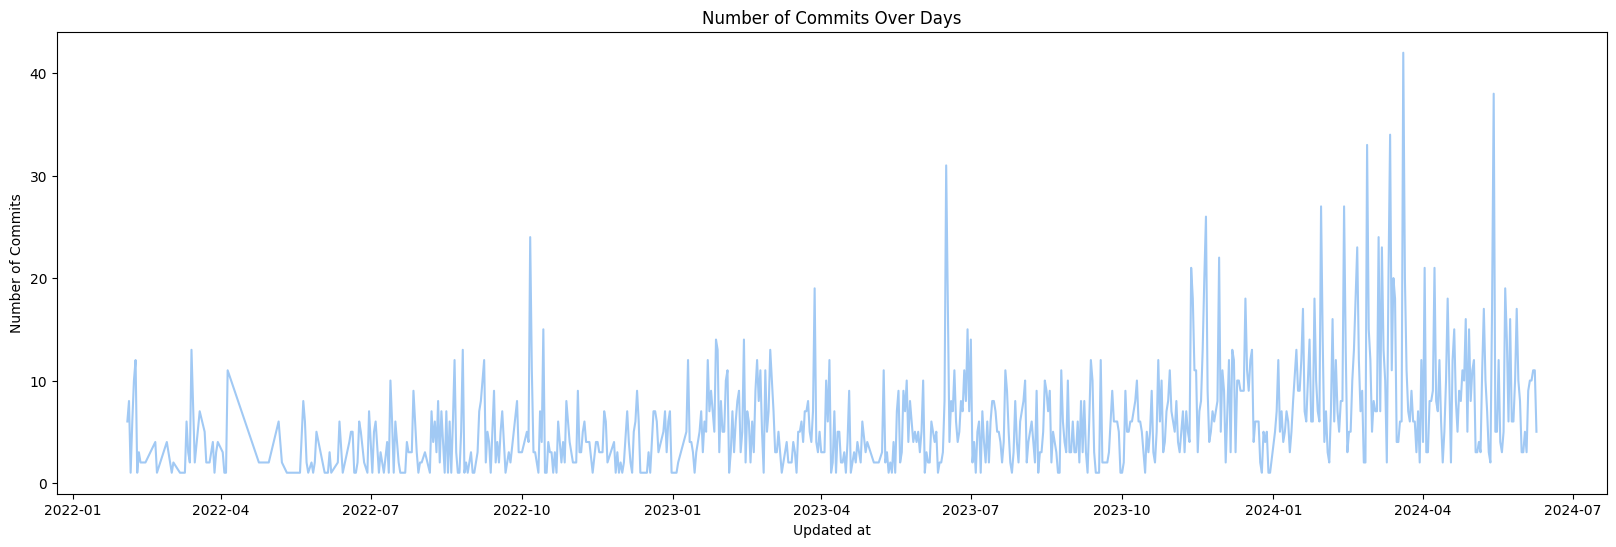

In [72]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=commit_counts, x='Updated at', y='Commit count')
plt.title("Number of Commits Over Days")
plt.xlabel('Updated at')
plt.ylabel("Number of Commits")
plt.show()

In [73]:
commit_counts = df.groupby(df['Updated at'].dt.date).size().reset_index(name='Commit count')
commit_counts['Updated at'] = pd.to_datetime(commit_counts['Updated at'])
commit_counts.set_index('Updated at', inplace=True)
weekly_commits = commit_counts.resample('W').sum()
monthly_commits = commit_counts.resample('M').sum()
yearly_commits = commit_counts.resample('A').sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11928\3587167547.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_commits = commit_counts.resample('M').sum()
C:\Users\Admin\AppData\Local\Temp\ipykernel_11928\3587167547.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_commits = commit_counts.resample('A').sum()


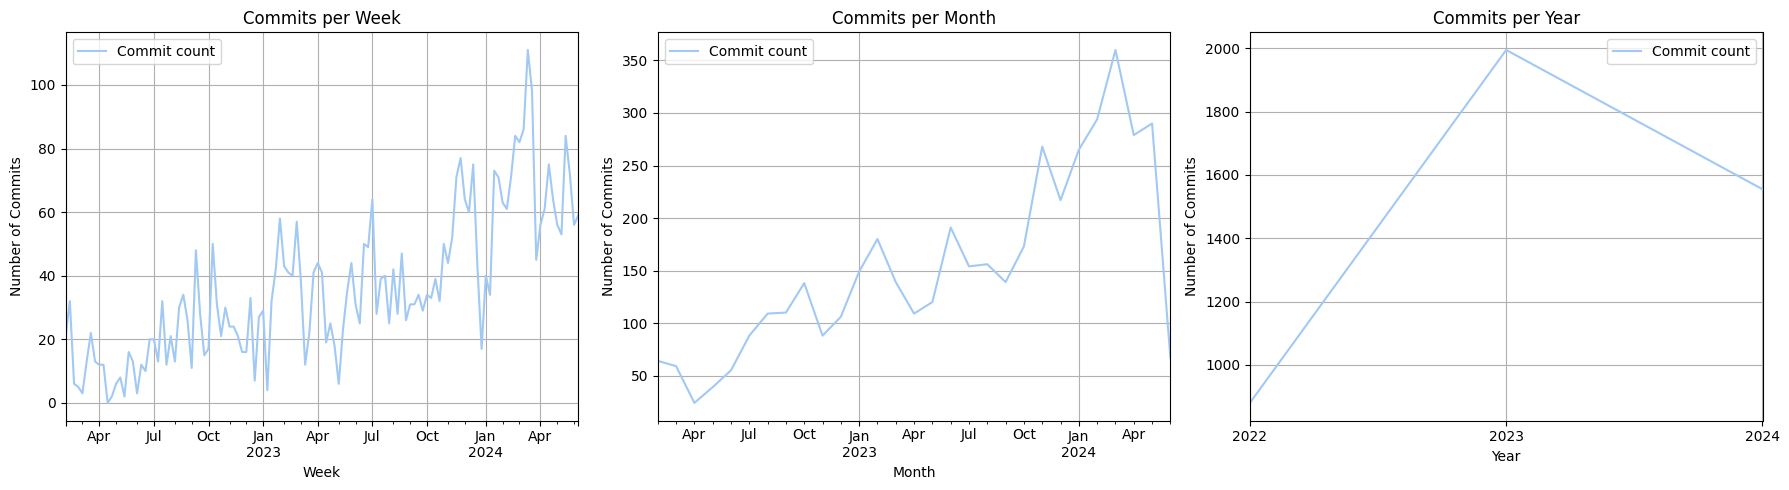

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  
weekly_commits.plot(ax=axes[0])
axes[0].set_title('Commits per Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Number of Commits')
axes[0].grid(True)
monthly_commits.plot(ax=axes[1])
axes[1].set_title('Commits per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Commits')
axes[1].grid(True)
yearly_commits.plot(ax=axes[2])
axes[2].set_title('Commits per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Commits')
axes[2].grid(True)
plt.tight_layout()  
plt.show()


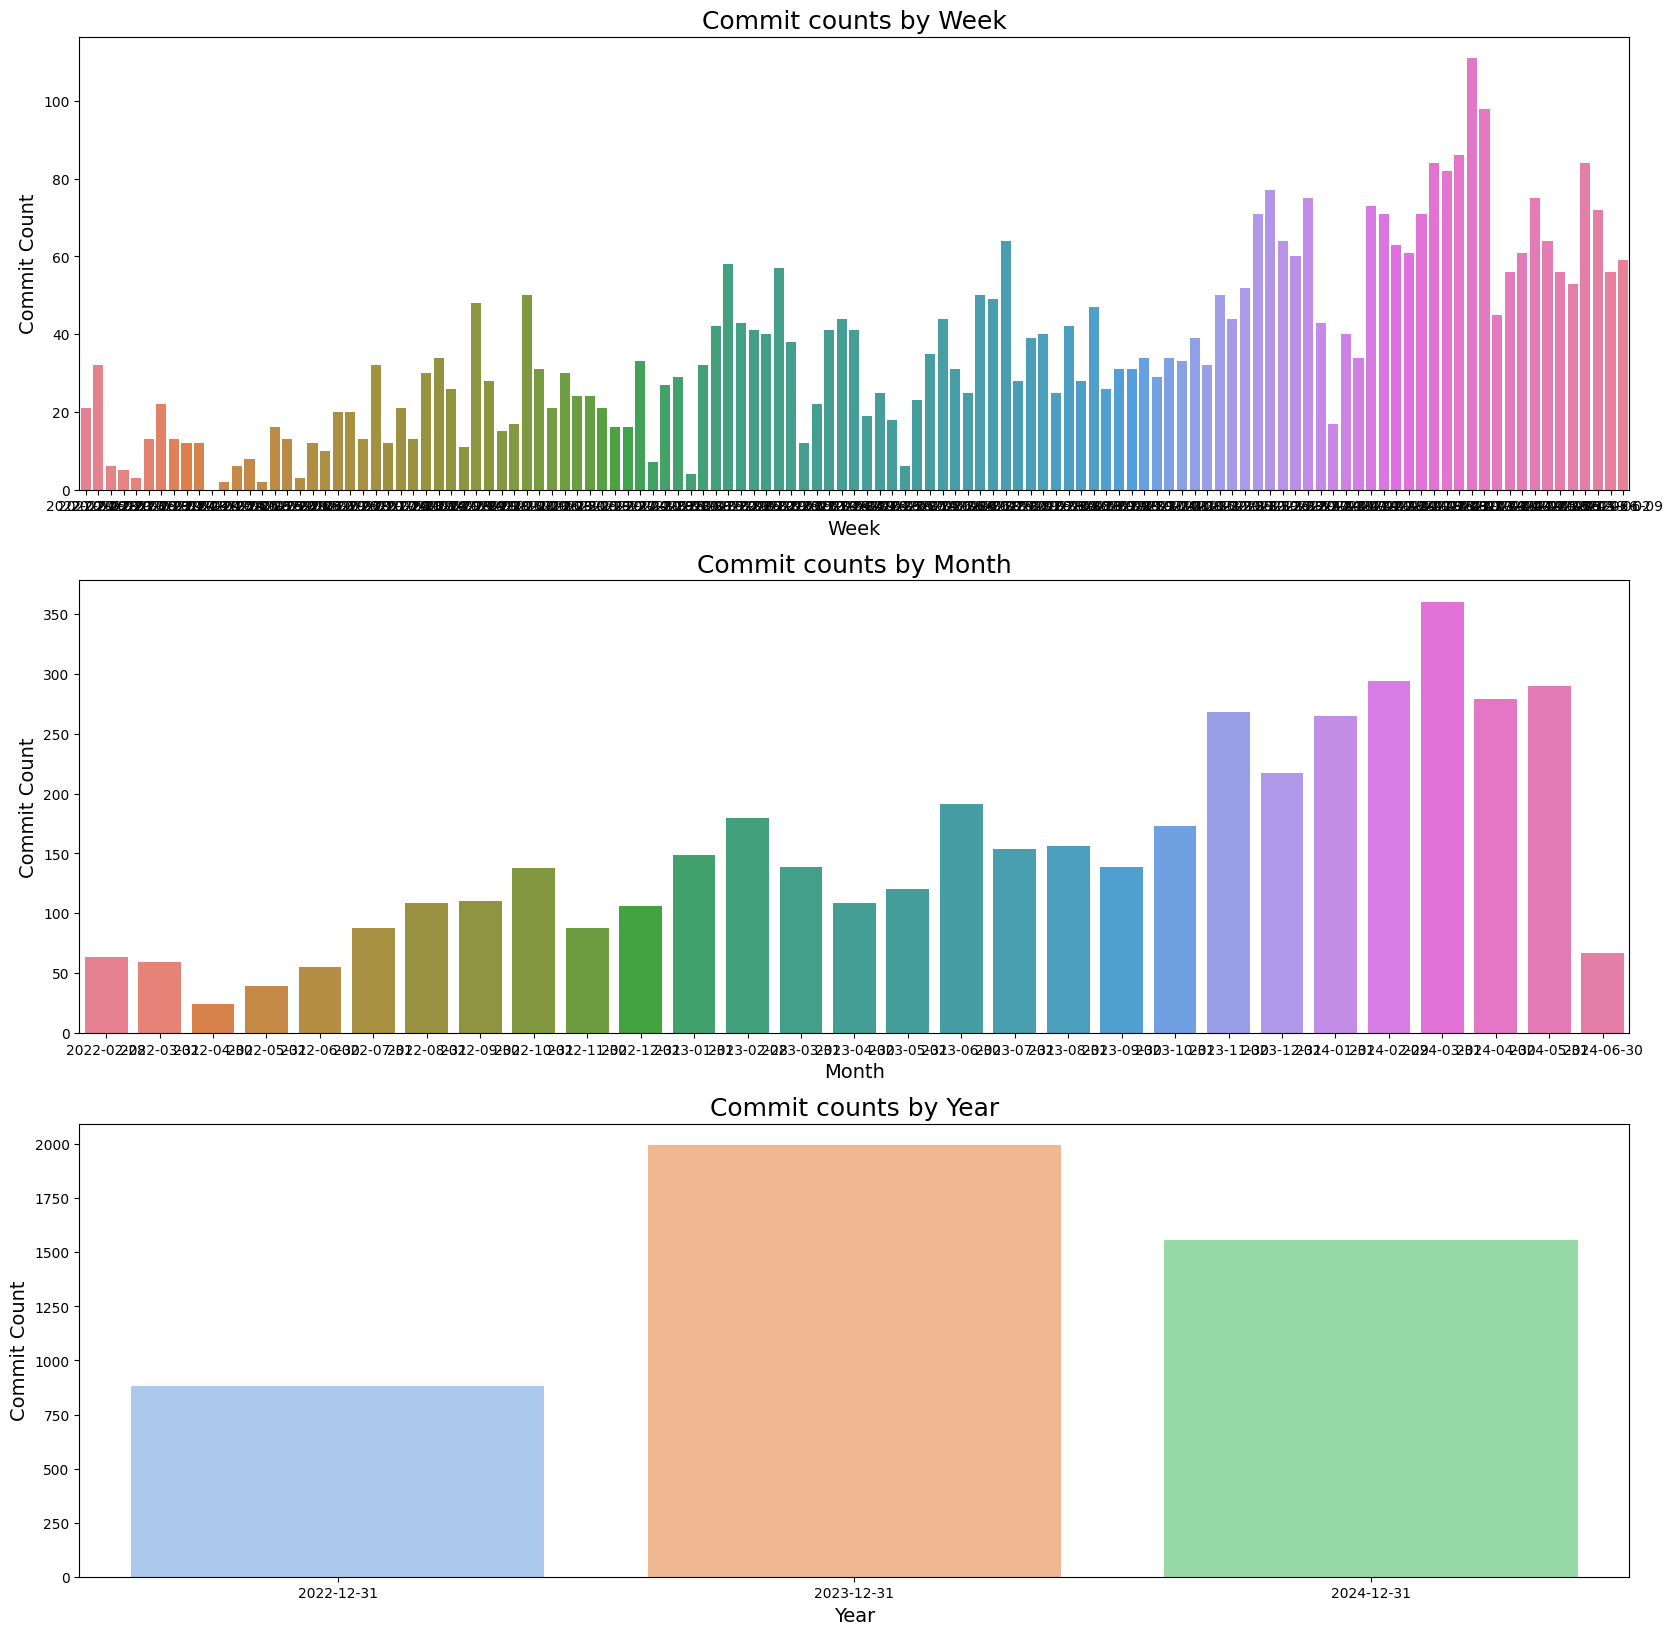

In [75]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
sns.barplot(data = weekly_commits,x=weekly_commits.index,y='Commit count', ax=axes[0], hue='Updated at')
axes[0].set_xlabel('Week',fontsize = 14)
axes[0].set_ylabel('Commit Count', fontsize = 14)
axes[0].set_title('Commit counts by Week', fontsize = 18)
sns.barplot(data = monthly_commits,x=monthly_commits.index,y='Commit count', ax=axes[1], hue = 'Updated at')
axes[1].set_xlabel('Month',fontsize = 14)
axes[1].set_ylabel('Commit Count', fontsize = 14)
axes[1].set_title('Commit counts by Month', fontsize = 18)
sns.barplot(data = yearly_commits,x=yearly_commits.index,y='Commit count', ax=axes[2], hue = 'Updated at')
axes[2].set_xlabel('Year', fontsize = 14)
axes[2].set_ylabel('Commit Count',fontsize = 14)
axes[2].set_title('Commit counts by Year', fontsize = 18)
plt.show()

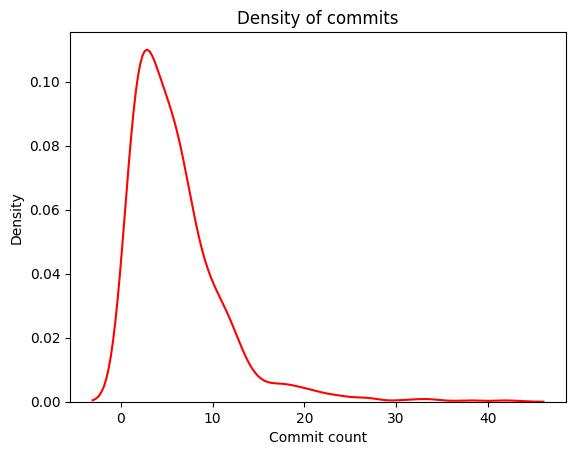

In [76]:
sns.kdeplot(data = commit_counts['Commit count'], color = 'red')
plt.title("Density of commits")
plt.show()

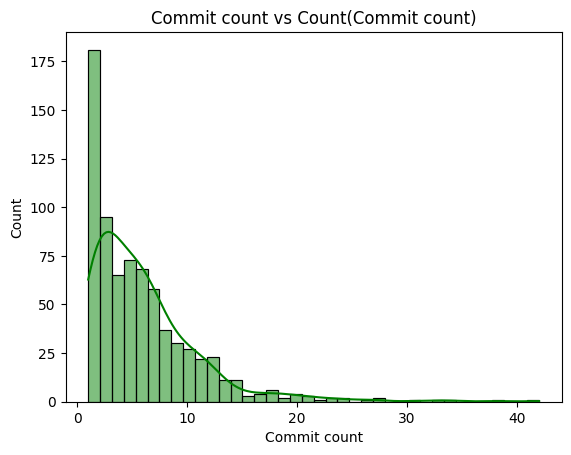

In [77]:
sns.histplot(commit_counts['Commit count'], color = 'green', kde=True)
plt.title("Commit count vs Count(Commit count)")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11928\1170732898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(20).index, palette=colors)


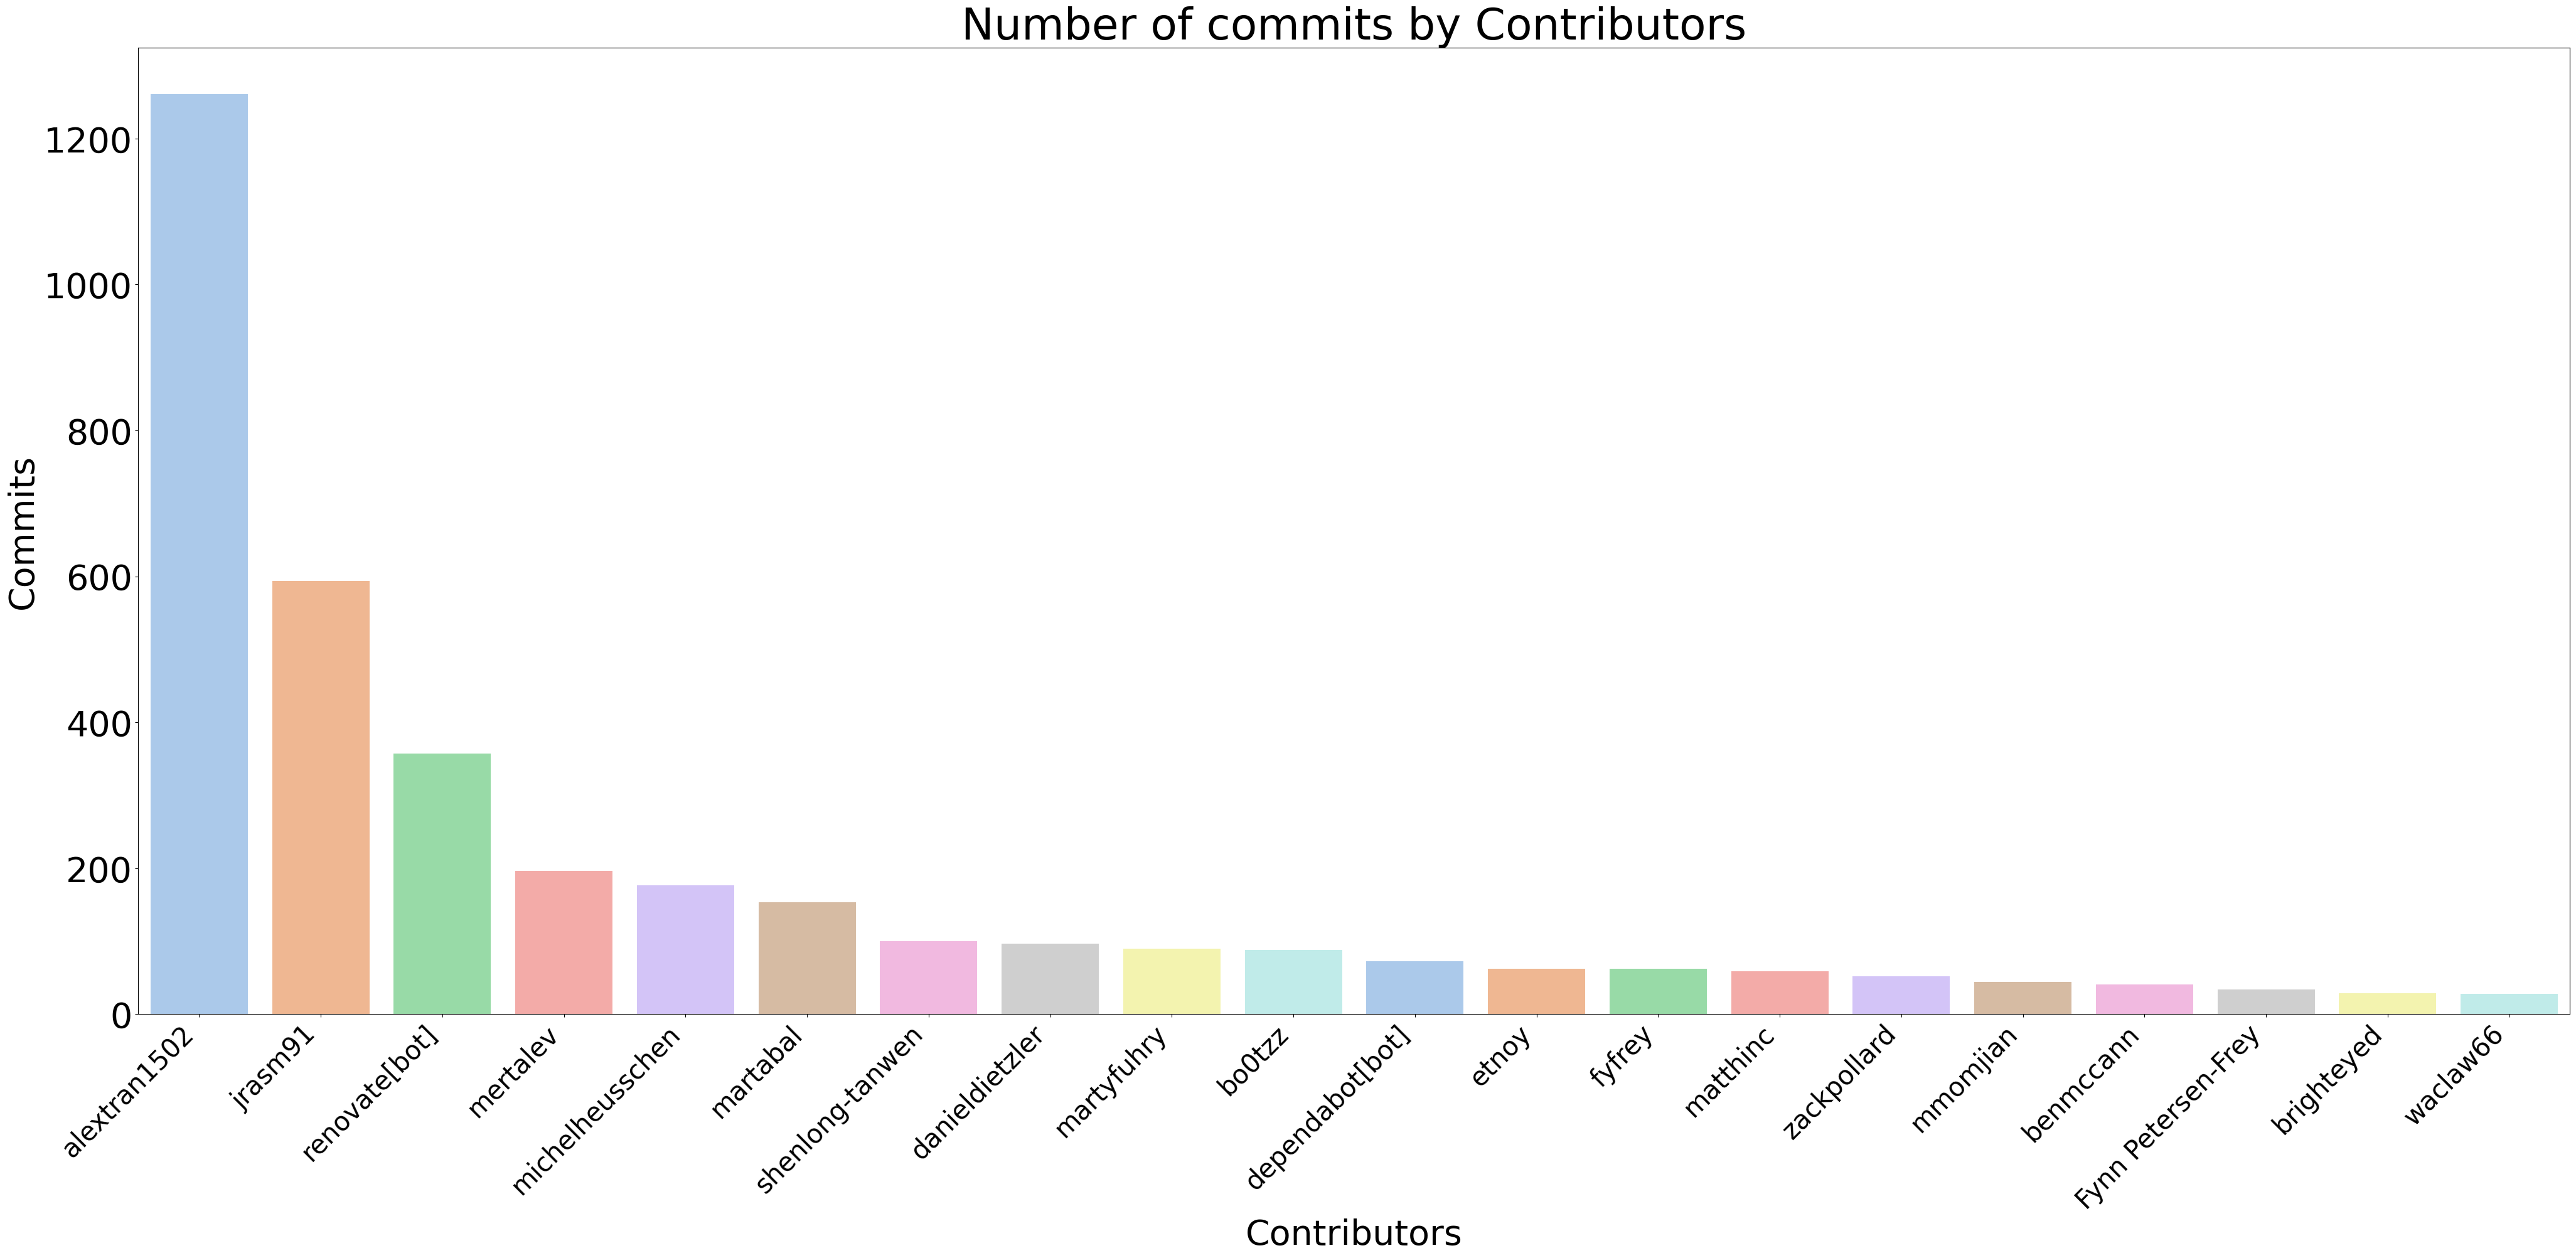

In [78]:
plt.figure(figsize=(50, 20))
colors = sns.color_palette("pastel", len(df['Contributor'].value_counts().head(20))) 
sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(20).index, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=30) 
plt.yticks(fontsize=40) 
plt.xlabel('Contributors', fontsize=40)
plt.ylabel('Commits', fontsize=40) 
plt.title('Number of commits by Contributors', fontsize = 50)
plt.show()

In [79]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
time_activity = df.groupby('Contributor')['Updated at'].agg(['min', 'max'])
commit_contrib = df['Contributor'].value_counts()
commit_contrib.reset_index('Contributor')
time_activity = pd.merge(time_activity, commit_contrib, on="Contributor", how="inner")
time_activity = time_activity.reset_index('Contributor')

In [80]:
df_temp = pd.DataFrame()
df_temp['Contributor'] = time_activity['Contributor']
df_temp['Date'] = time_activity['min'].dt.date
df_temp = df_temp.reset_index(drop = True)
df_temp = df_temp.value_counts('Date', ascending=True)
df_temp = pd.DataFrame(df_temp)
df_temp = df_temp.rename(columns = {'count':'Number of contributor'})
df_temp = df_temp.reset_index('Date')
df_temp['Month'] = pd.to_datetime(df_temp['Date']).dt.strftime('%m-%Y')
df_temp['Year']= pd.to_datetime(df_temp['Date']).dt.strftime('%Y')


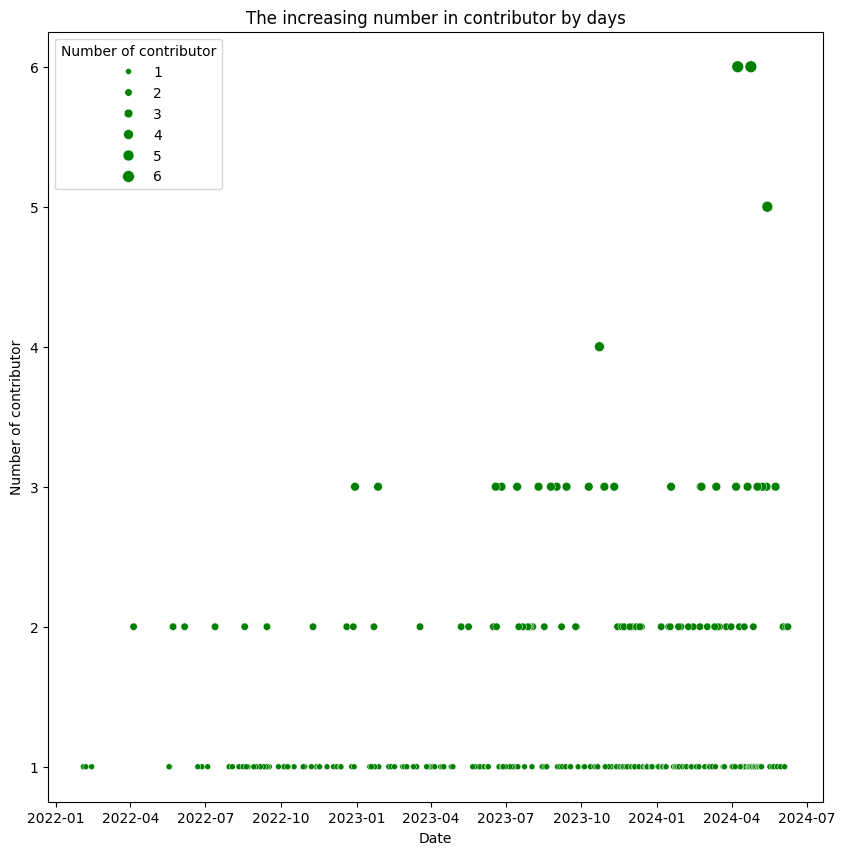

In [81]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data=df_temp, x = 'Date', y = 'Number of contributor', color = 'g', size = 'Number of contributor')
plt.title('The increasing number in contributor by days')
plt.show()

Text(0.5, 1.0, 'The increasing number in contributor by month')

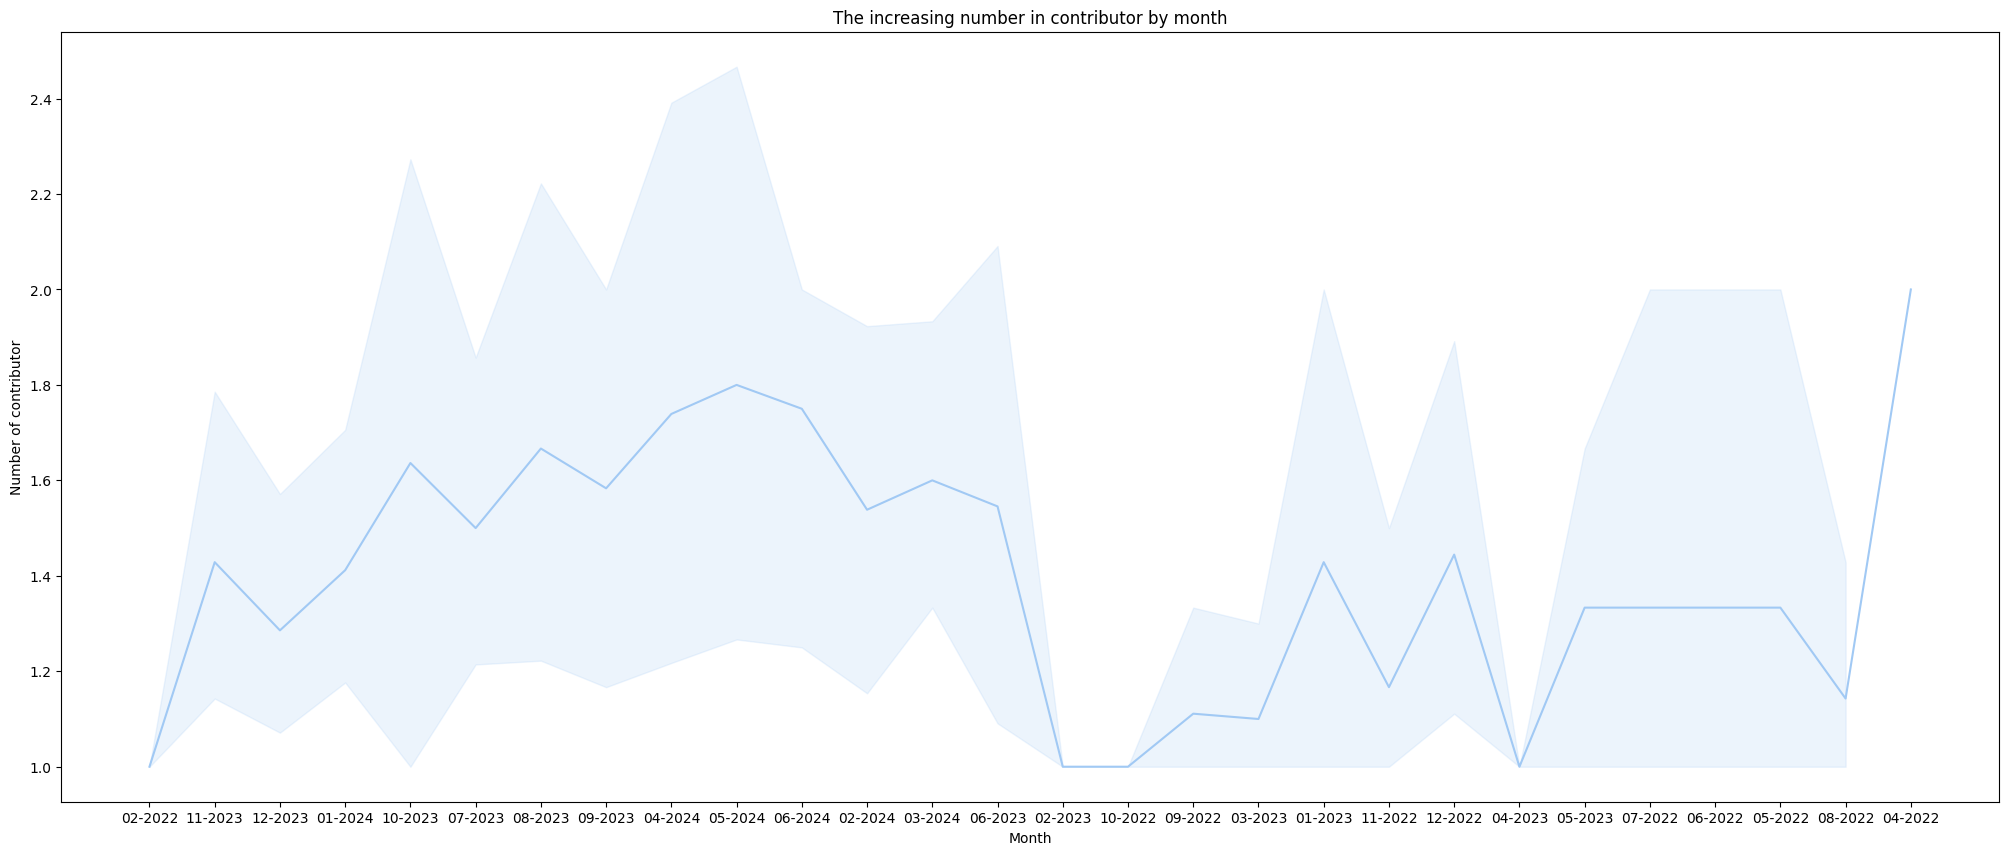

In [82]:
plt.figure(figsize = (25, 10))
sns.lineplot(data = df_temp, x = 'Month', y = 'Number of contributor')
plt.title('The increasing number in contributor by month')

In [83]:
df_commit_contrib = pd.read_csv('C:/Users/Admin/Downloads/df_commit_contrib.csv')

<Figure size 1000x1000 with 0 Axes>

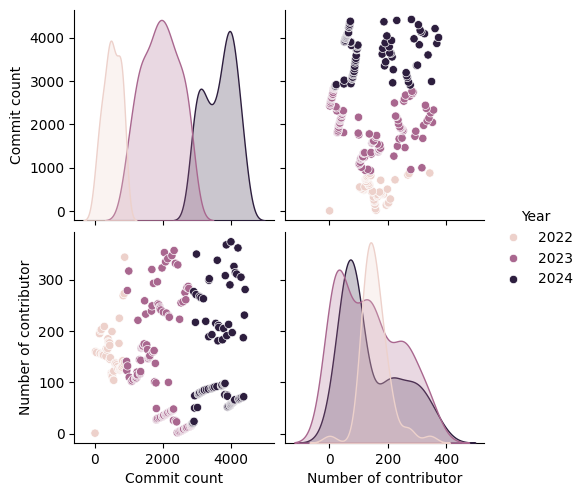

In [84]:
plt.figure(figsize = (10, 10))
sns.pairplot(data = df_commit_contrib, hue = 'Year')

<Axes: xlabel='Year', ylabel='Number of contributor'>

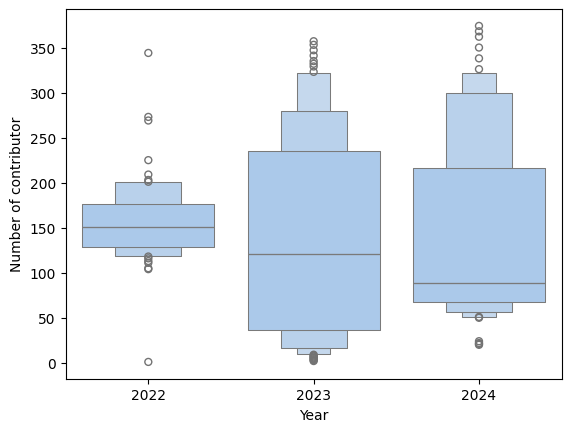

In [85]:
sns.boxenplot(data = df_commit_contrib, x='Year', y ='Number of contributor')

<Axes: xlabel='Year', ylabel='Commit count'>

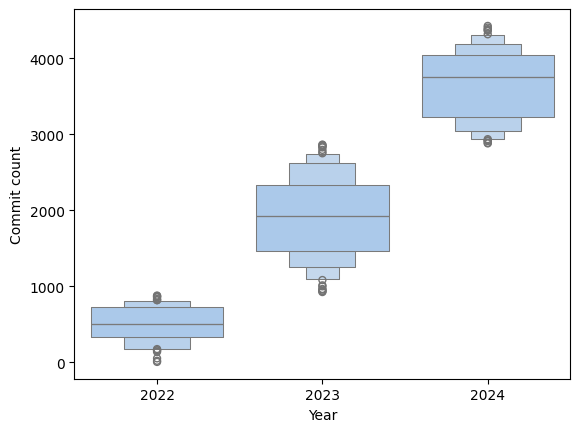

In [86]:
sns.boxenplot(data = df_commit_contrib, x='Year', y ='Commit count')

In [87]:
commit_count = pd.DataFrame()
commit_count['Commit count'] = df['Contributor'].value_counts().head(10)
commit_count = commit_count.reset_index(names = 'Contributor')
total_commits = commit_count['Commit count'].sum()
others_commits = df.shape[0] - total_commits
new_row = pd.DataFrame({'Contributor': 'others', 
                        'Commit count': [others_commits],
                        })
commit_count = pd.concat([commit_count, new_row], ignore_index=True)

In [88]:
sns.set_palette('pastel')

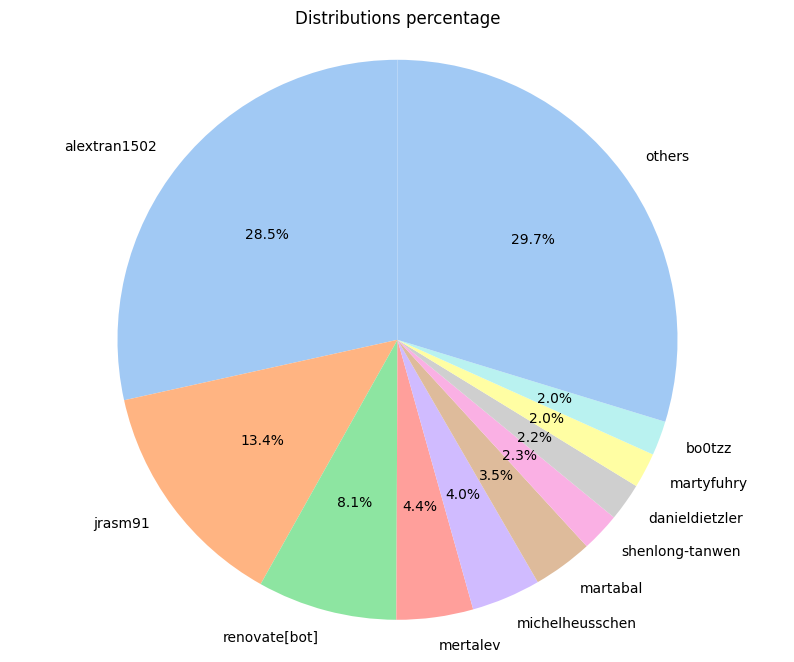

In [89]:
fig, ax = plt.subplots(figsize =(10, 8))
ax.pie(commit_count['Commit count'], labels = commit_count['Contributor'], autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
ax.set_title('Distributions percentage')
plt.show()

Số lượng pull request và commit

In [90]:
pr_df['Date'] = pd.to_datetime(pr_df['Updated_at']).dt.strftime('%d-%m-%Y')
df_temp['Commit count'] = pr_df['Commits']

In [91]:
result = pr_df.groupby('Date').agg(
    pull_request_count = ('Updated_at', 'size'),
    total_commit_count = ('Commits', 'sum')
)

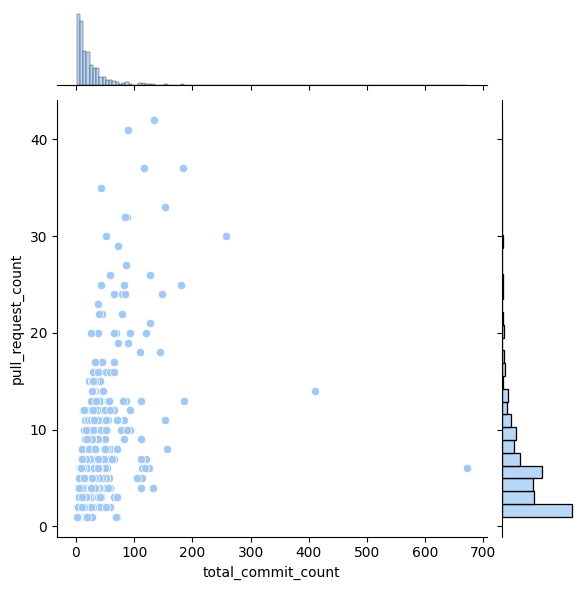

In [92]:
sns.jointplot(data = result, y= 'pull_request_count',x = 'total_commit_count' )

In [93]:
total_lines = language_df['lines'].sum()
language_df['percentage(%)'] = language_df['lines']*100/total_lines

In [94]:
df_temp = language_df[language_df['percentage(%)'] > 2]
others_pc = 100-df_temp['percentage(%)'].sum()
other_lines = total_lines - df_temp['lines'].sum()
new_row = pd.DataFrame({'language':'Others',
                        'lines': [other_lines],
                        'percentage(%)':[others_pc]})
df_temp = pd.concat([df_temp, new_row], ignore_index=True)

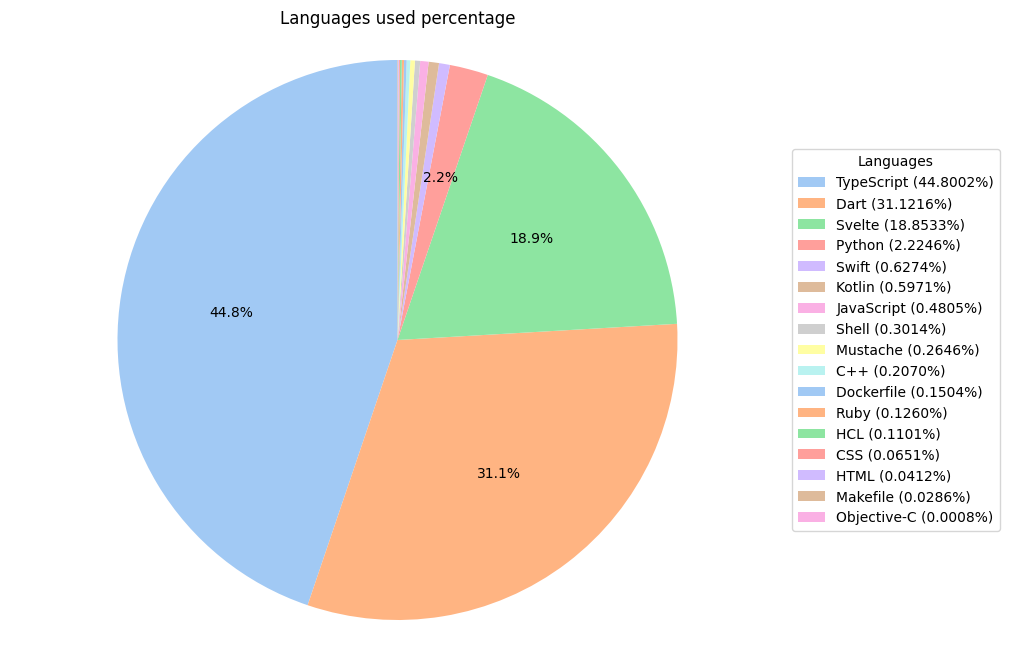

In [95]:

fig, ax = plt.subplots(figsize =(10, 8))
wedges, texts, autotexts = ax.pie(language_df['lines'], autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',startangle = 90)
ax.axis('equal')
ax.set_title('Languages used percentage')
legend_labels = [ '{} ({:.4f}%)'.format(lang, 100 * val / sum(language_df['lines'])) for lang, val in zip(language_df['language'], language_df['lines'])]
ax.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [96]:
df_temp = pr_df.groupby('Author').size()
df_temp = df_temp.reset_index(name =  'Prs')
df_temp = df_temp.sort_values('Prs', ascending=False)
df_temp = df_temp.head(10)

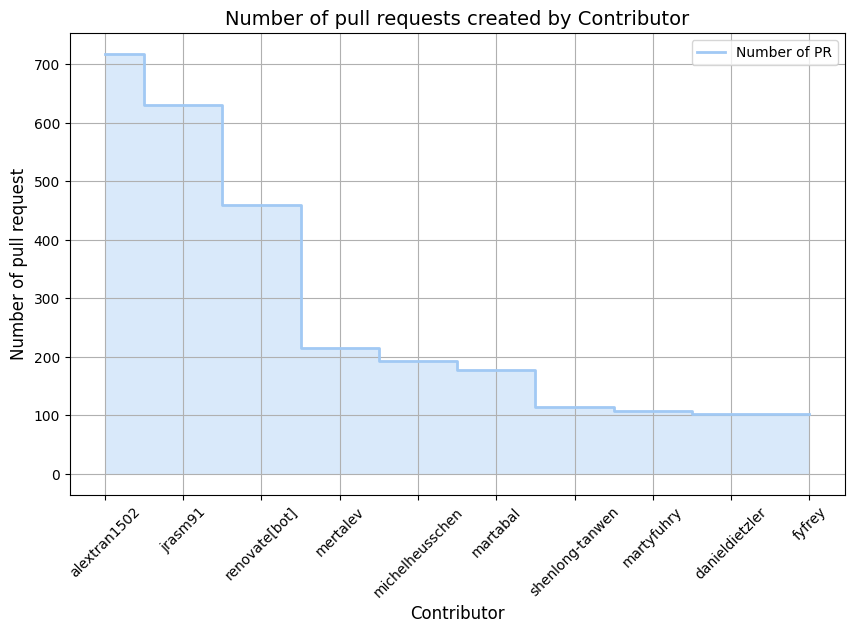

In [97]:
plt.figure(figsize=(10, 6))
plt.step(df_temp['Author'], df_temp['Prs'], where='mid', label='Number of PR', linewidth=2)
plt.fill_between(df_temp['Author'], df_temp['Prs'], step='mid', alpha=0.4)
plt.title('Number of pull requests created by Contributor', fontsize=14)
plt.xlabel('Contributor', fontsize=12)
plt.ylabel('Number of pull request', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [98]:
pr_df['Created_at'] = pd.to_datetime(pr_df['Created_at'])
df_temp = pr_df.groupby(pr_df['Created_at'].dt.date).size()
df_temp = df_temp.reset_index(name = 'Prs')
df_temp

Created_at  Prs
0    2022-02-06    2
1    2022-02-07    1
2    2022-02-08    2
3    2022-02-09    1
4    2022-02-10    1
..          ...  ...
744  2024-06-09    5
745  2024-06-10   19
746  2024-06-11   32
747  2024-06-12   24
748  2024-06-13   10

[749 rows x 2 columns]

Text(0, 0.5, 'Number of PR')

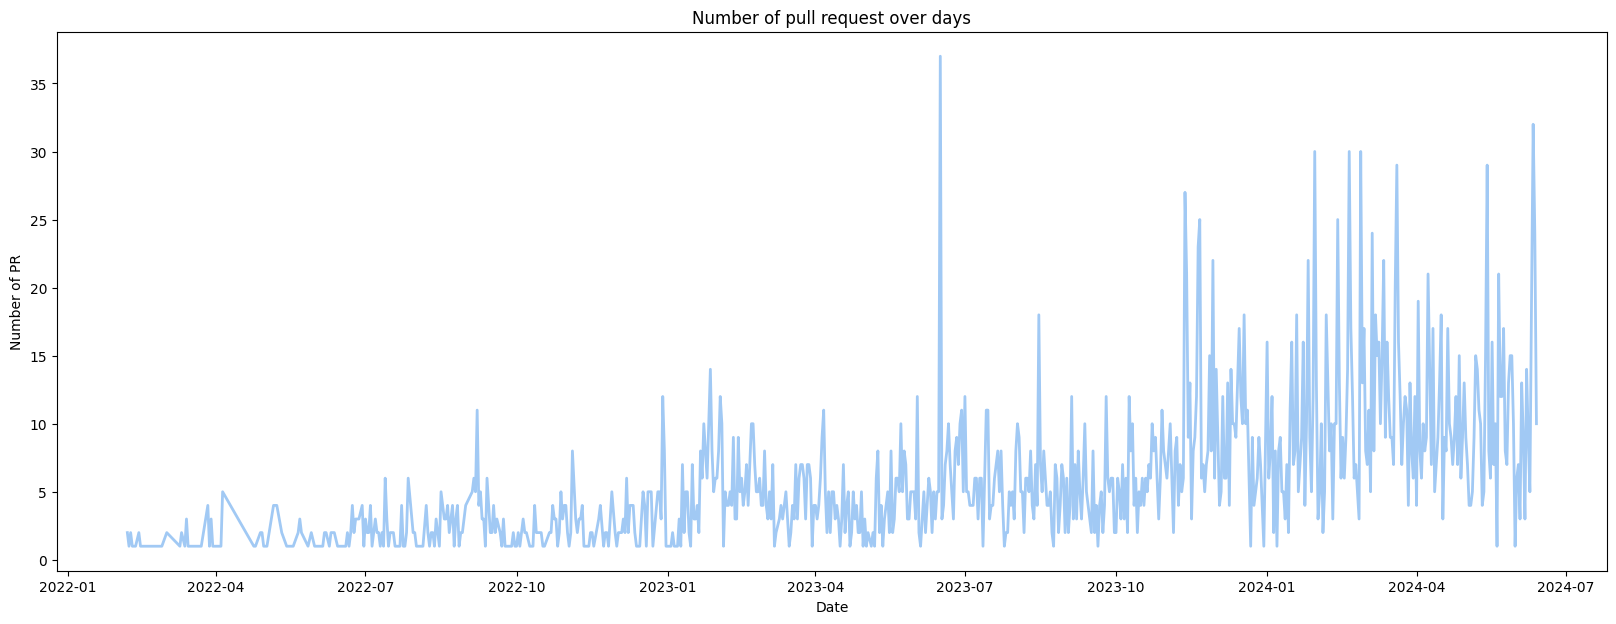

In [99]:
fig,ax=plt.subplots(figsize=(20,7))
ax.plot(df_temp['Created_at'], df_temp['Prs'], linewidth=2)
plt.title('Number of pull request over days')
plt.xlabel('Date')
plt.ylabel('Number of PR')

In [100]:
issue_df['Created_at'] = pd.to_datetime(issue_df['Created_at'])
df_temp = issue_df.groupby(issue_df['Created_at'].dt.date).size()
df_temp = df_temp.reset_index(name = 'Issues')
df_temp

Created_at  Issues
0    2022-02-05       1
1    2022-02-06       5
2    2022-02-07       1
3    2022-02-08       1
4    2022-02-09       1
..          ...     ...
710  2024-06-10       3
711  2024-06-11      32
712  2024-06-12      24
713  2024-06-13      23
714  2024-06-14      17

[715 rows x 2 columns]

Text(0, 0.5, 'Number of Issue')

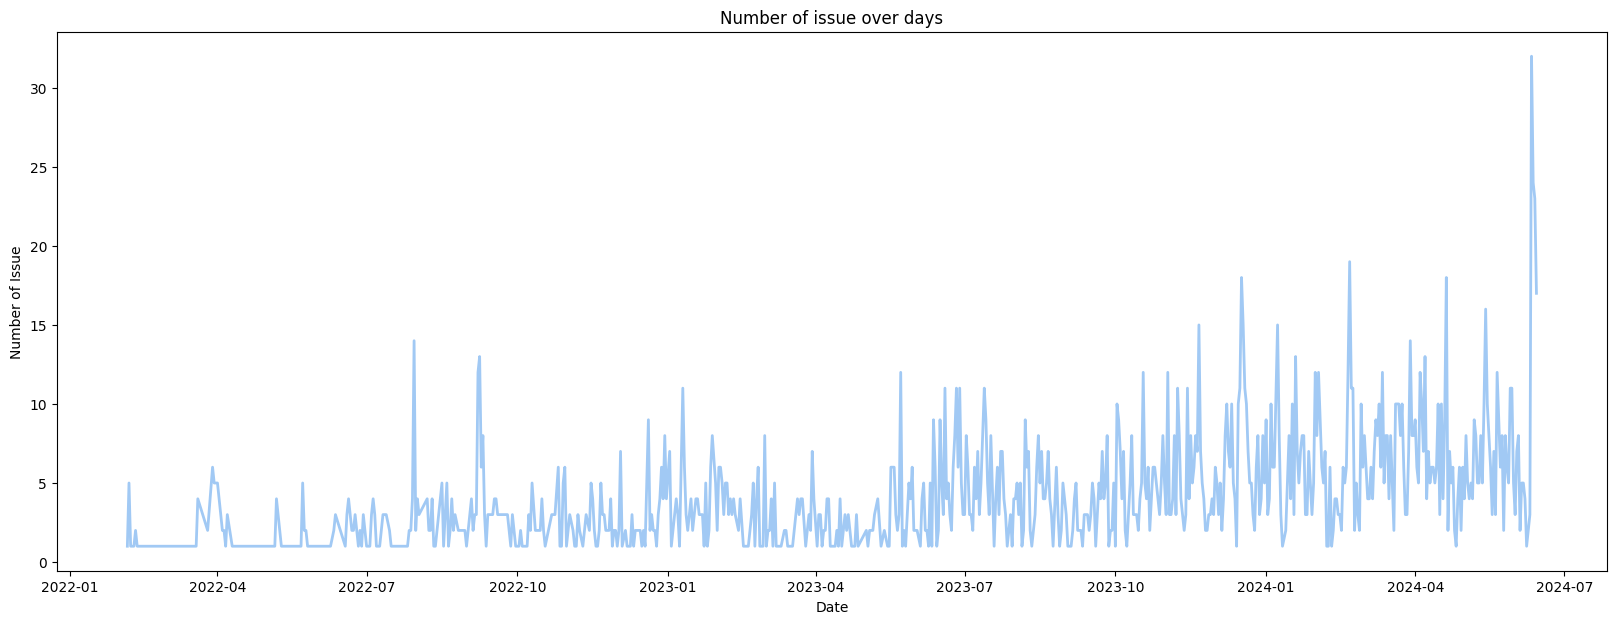

In [101]:
fig,ax=plt.subplots(figsize=(20,7))
ax.plot(df_temp['Created_at'], df_temp['Issues'], linewidth=2)
plt.title('Number of issue over days')
plt.xlabel('Date')
plt.ylabel('Number of Issue')

In [102]:
issue_df['Date'] = pd.to_datetime(issue_df['Created_at']).dt.date

In [103]:
issue_df

Author  Comment user          Created_at            Closed_at  \
0         eygraber           NaN 2024-06-14 23:52:27  2024-06-15 00:56:58   
1     manuelcortez           NaN 2024-06-14 22:39:28                  NaN   
2         arnar-th        bo0tzz 2024-06-14 18:32:00  2024-06-14 21:26:48   
3         seanmuth           NaN 2024-06-14 15:53:39  2024-06-14 15:55:07   
4        Mubelotix      mmomjian 2024-06-14 15:21:48  2024-06-14 15:25:11   
...            ...           ...                 ...                  ...   
3033  alextran1502           NaN 2022-02-06 06:57:52  2022-02-07 02:32:09   
3034  alextran1502  alextran1502 2022-02-06 06:37:29  2022-02-08 06:27:24   
3035  alextran1502  alextran1502 2022-02-06 06:37:24  2022-02-08 03:44:44   
3036  alextran1502           NaN 2022-02-06 06:37:08  2022-02-06 06:50:47   
3037  alextran1502           NaN 2022-02-05 07:04:44  2022-02-06 06:26:15   

       State           Labels         Assignees        Date  
0     closed               []                []  2024-06-14  
1       open               []                []  2024-06-14  
2     closed               []                []  2024-06-14  
3     closed               []                []  2024-06-14  
4     closed               []                []  2024-06-14  
...      ...              ...               ...         ...  
3033  closed  ['enhancement']                []  2022-02-06  
3034  closed  ['enhancement']                []  2022-02-06  
3035  closed  ['enhancement']                []  2022-02-06  
3036  closed               []                []  2022-02-06  
3037  closed      ['feature']  ['alextran1502']  2022-02-05  

[3038 rows x 8 columns]

Biểu đồ thời gian giải quyết các issue

In [104]:
issue_df['Created_at'] = pd.to_datetime(issue_df['Created_at'])
issue_df['Closed_at'] = pd.to_datetime(issue_df['Closed_at'])
issue_df['duration'] = (issue_df['Closed_at'] - issue_df['Created_at']).dt.total_seconds()
issue_df.loc[issue_df['State'] == 'open', 'duration'] = pd.NaT

C:\Users\Admin\AppData\Local\Temp\ipykernel_11928\570179033.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  issue_df.loc[issue_df['State'] == 'open', 'duration'] = pd.NaT


In [105]:
df_temp = issue_df[issue_df['duration'].notnull()]
df_temp = df_temp.groupby('duration').size().reset_index(name='count')

In [106]:
# fig,ax=plt.subplots()
# ax.bar(df_temp['duration'], df_temp['Created_at'])

In [107]:
df_temp = issue_df.groupby('Author').size()
df_temp = df_temp.reset_index(name =  'Issues')
df_temp = df_temp.sort_values('Issues', ascending=False)
df_temp = df_temp.head(10)

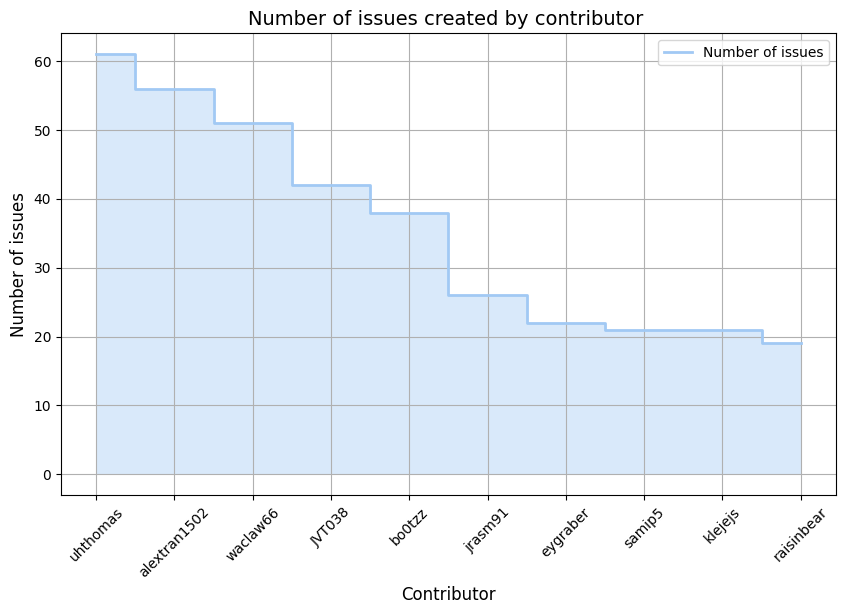

In [108]:
plt.figure(figsize=(10, 6))
plt.step(df_temp['Author'], df_temp['Issues'], where='mid', label='Number of issues', linewidth=2)
plt.fill_between(df_temp['Author'], df_temp['Issues'], step='mid', alpha=0.4)
plt.title('Number of issues created by contributor ', fontsize=14)
plt.xlabel('Contributor', fontsize=12)
plt.ylabel('Number of issues', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [109]:
import networkx as nx

In [110]:
G = nx.Graph()
df_temp = pd.DataFrame()
df_temp['Author'] = pr_df['Author'].copy()
df_temp['Reviewer'] = pr_df['Reviewer'].copy()

In [111]:
for i in range(df_temp.shape[0]-1):
    if df_temp['Reviewer'].loc[i] !='':
        G.add_edge(df_temp['Author'].loc[i],df_temp['Reviewer'].loc[i])

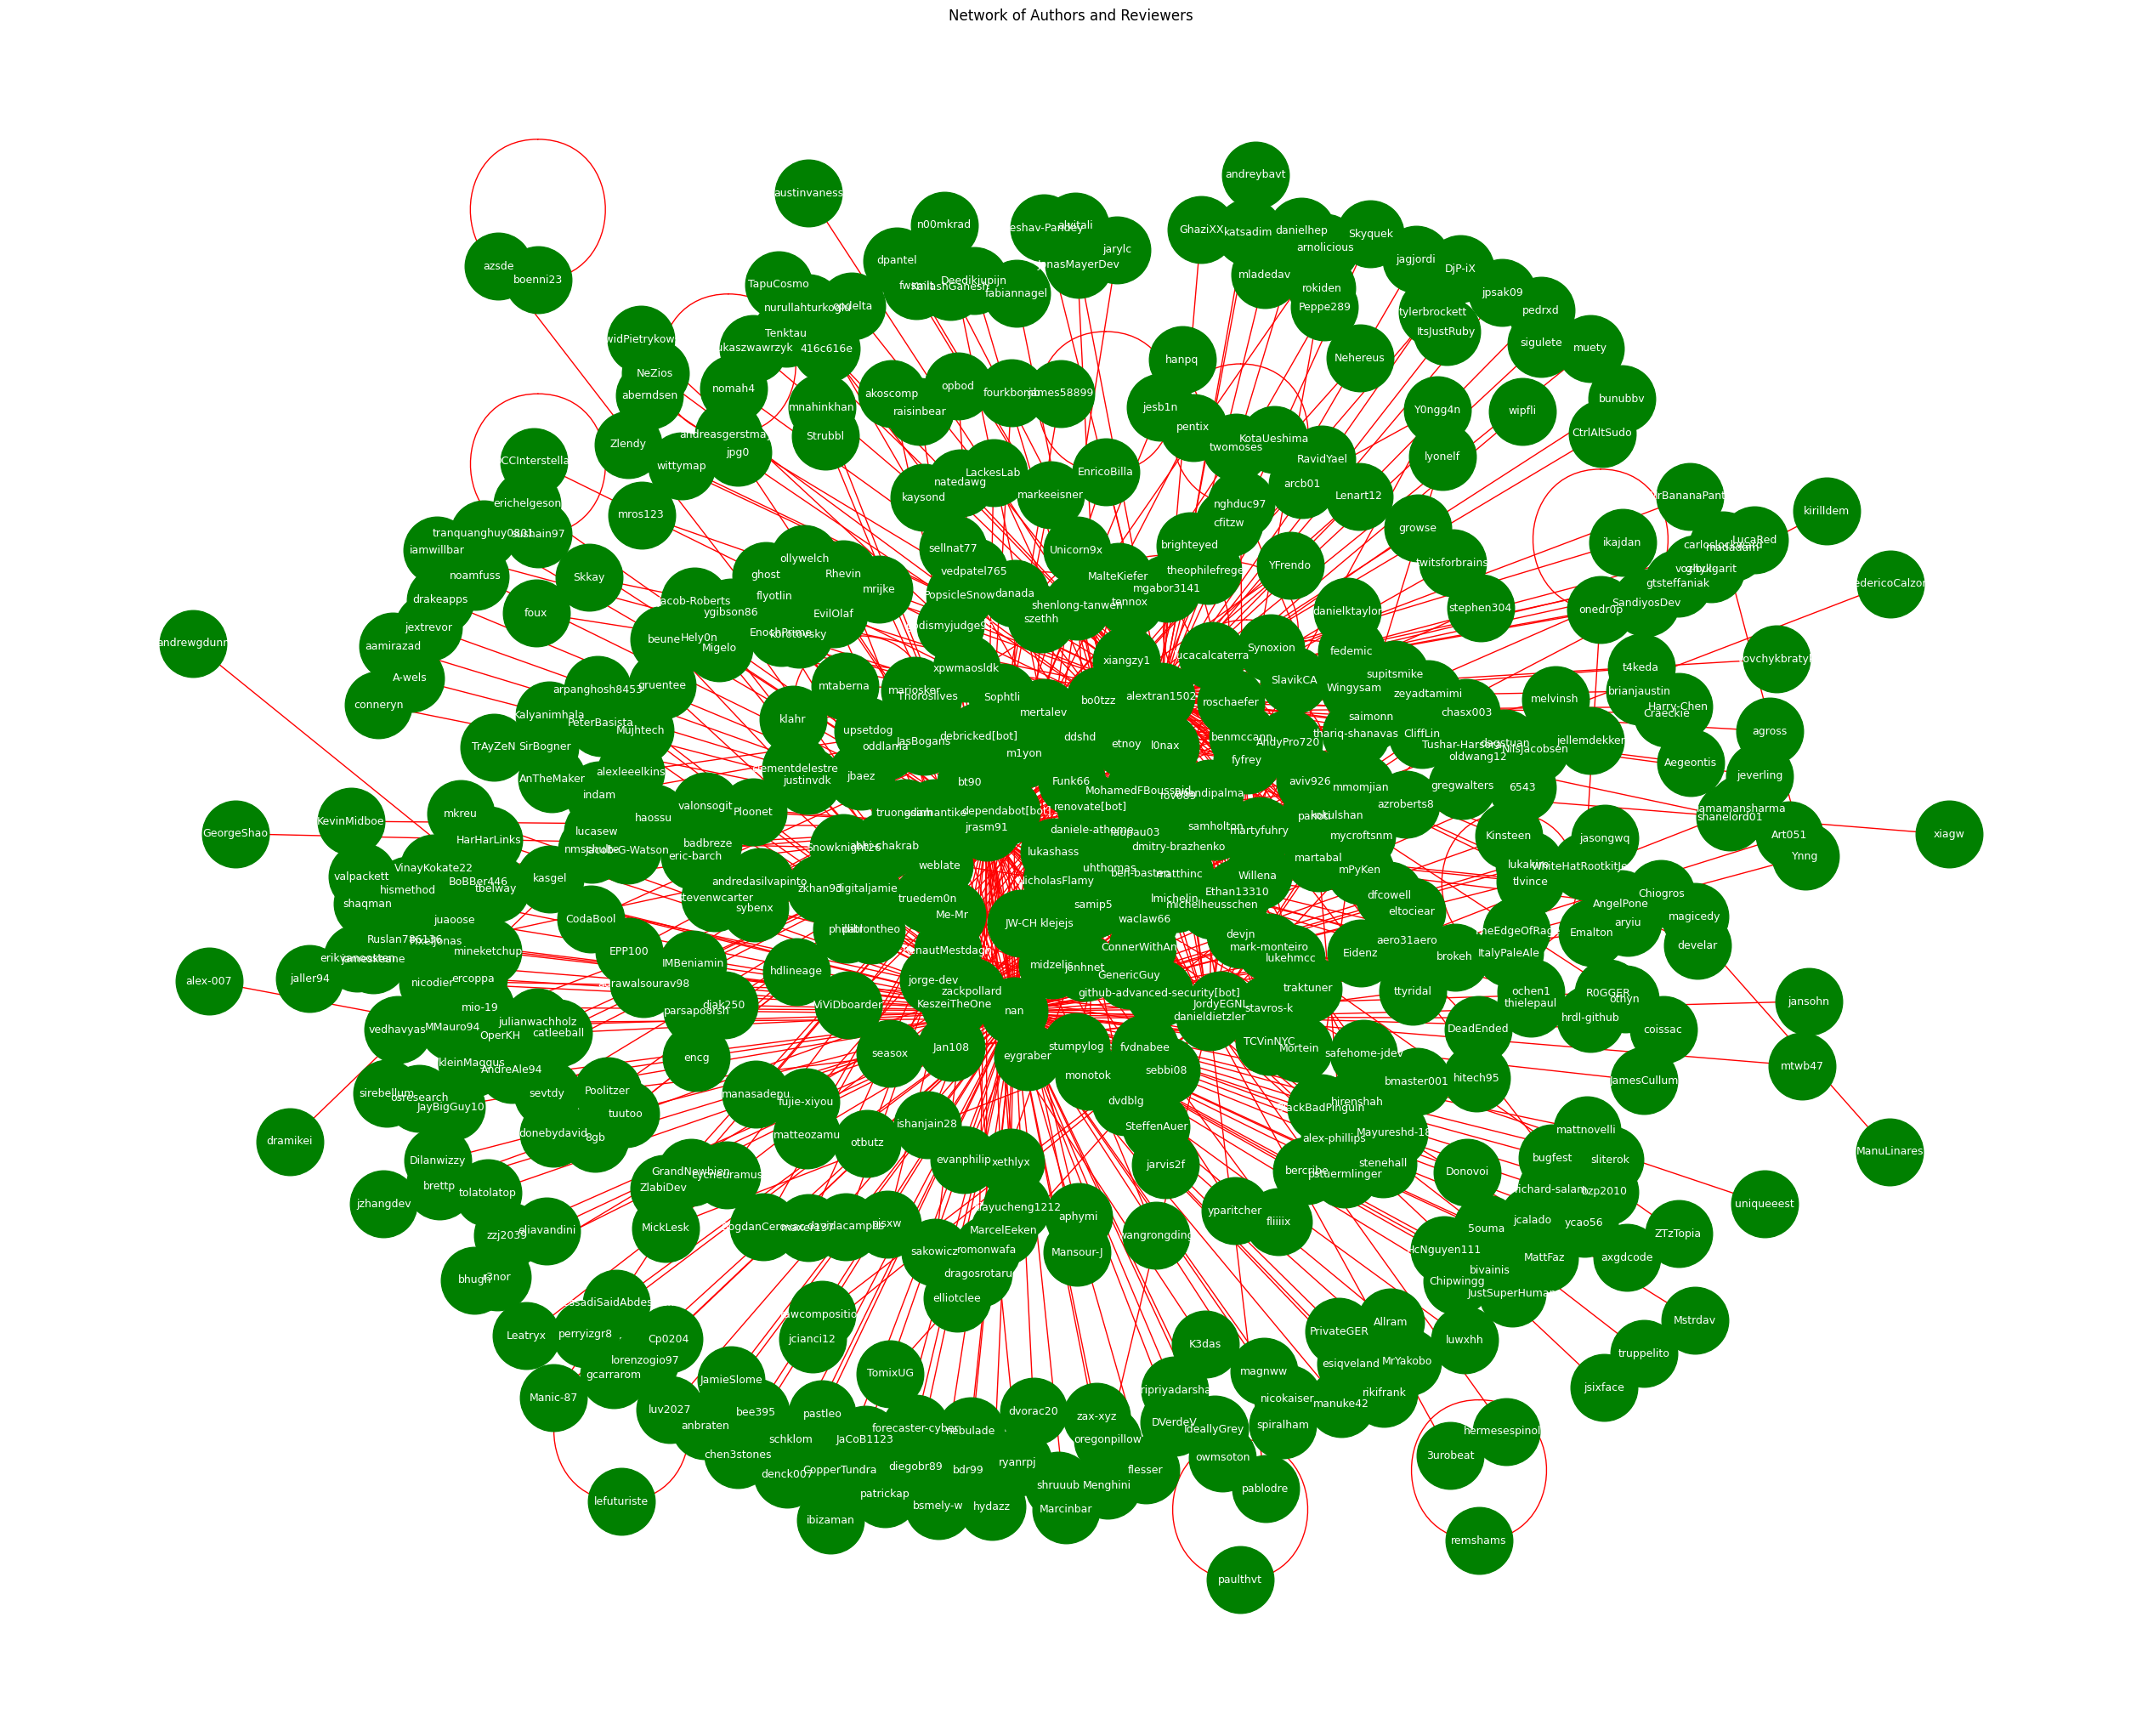

In [112]:
pos = nx.spring_layout(G, k=0.3) 
plt.figure(figsize=(25, 20))  
nx.draw(G, pos, with_labels=True, node_size=3200, font_size=9, font_color='white', node_color='green', edge_color='red')
plt.title('Network of Authors and Reviewers')
plt.show()

In [113]:
issue_df

Author  Comment user          Created_at           Closed_at  \
0         eygraber           NaN 2024-06-14 23:52:27 2024-06-15 00:56:58   
1     manuelcortez           NaN 2024-06-14 22:39:28                 NaT   
2         arnar-th        bo0tzz 2024-06-14 18:32:00 2024-06-14 21:26:48   
3         seanmuth           NaN 2024-06-14 15:53:39 2024-06-14 15:55:07   
4        Mubelotix      mmomjian 2024-06-14 15:21:48 2024-06-14 15:25:11   
...            ...           ...                 ...                 ...   
3033  alextran1502           NaN 2022-02-06 06:57:52 2022-02-07 02:32:09   
3034  alextran1502  alextran1502 2022-02-06 06:37:29 2022-02-08 06:27:24   
3035  alextran1502  alextran1502 2022-02-06 06:37:24 2022-02-08 03:44:44   
3036  alextran1502           NaN 2022-02-06 06:37:08 2022-02-06 06:50:47   
3037  alextran1502           NaN 2022-02-05 07:04:44 2022-02-06 06:26:15   

       State           Labels         Assignees        Date  duration  
0     closed               []                []  2024-06-14    3871.0  
1       open               []                []  2024-06-14       NaT  
2     closed               []                []  2024-06-14   10488.0  
3     closed               []                []  2024-06-14      88.0  
4     closed               []                []  2024-06-14     203.0  
...      ...              ...               ...         ...       ...  
3033  closed  ['enhancement']                []  2022-02-06   70457.0  
3034  closed  ['enhancement']                []  2022-02-06  172195.0  
3035  closed  ['enhancement']                []  2022-02-06  162440.0  
3036  closed               []                []  2022-02-06     819.0  
3037  closed      ['feature']  ['alextran1502']  2022-02-05   84091.0  

[3038 rows x 9 columns]

In [114]:
issue_df.dtypes

Author                  object
Comment user            object
Created_at      datetime64[ns]
Closed_at       datetime64[ns]
State                   object
Labels                  object
Assignees               object
Date                    object
duration                object
dtype: object

In [115]:
df_temp

Author         Reviewer
0     richard-salam              NaN
1          waclaw66  michelheusschen
2       zackpollard          jrasm91
3      alextran1502          jrasm91
4       zackpollard           bo0tzz
...             ...              ...
4413   alextran1502              NaN
4414   alextran1502              NaN
4415   alextran1502              NaN
4416        schklom              NaN
4417   alextran1502              NaN

[4418 rows x 2 columns]

In [116]:
G2 = nx.Graph()
df_temp = pd.DataFrame()
df_temp['Author'] = issue_df['Author'].copy()
df_temp['Comment user'] = issue_df['Comment user'].copy()

In [117]:
df_cleaned = df_temp.dropna(subset=['Comment user'])
df_cleaned = df_cleaned.reset_index(drop=True)

In [118]:
df_cleaned

Author  Comment user
0          arnar-th        bo0tzz
1         Mubelotix      mmomjian
2      mluettermann        bo0tzz
3          klendgit     petersuba
4           ykrasik  alextran1502
...             ...           ...
2423        schklom  alextran1502
2424     ippocratis  alextran1502
2425  Gaming4LifeDE  alextran1502
2426   alextran1502  alextran1502
2427   alextran1502  alextran1502

[2428 rows x 2 columns]

In [119]:
df_cleaned[df_cleaned['Comment user'] != df_cleaned['Author']]

Author  Comment user
0          arnar-th        bo0tzz
1         Mubelotix      mmomjian
2      mluettermann        bo0tzz
3          klendgit     petersuba
4           ykrasik  alextran1502
...             ...           ...
2420  Gaming4LifeDE  alextran1502
2421     ippocratis  alextran1502
2423        schklom  alextran1502
2424     ippocratis  alextran1502
2425  Gaming4LifeDE  alextran1502

[2087 rows x 2 columns]

In [120]:
df_cleaned.drop_duplicates(subset=['Author', 'Comment user'])

Author  Comment user
0          arnar-th        bo0tzz
1         Mubelotix      mmomjian
2      mluettermann        bo0tzz
3          klendgit     petersuba
4           ykrasik  alextran1502
...             ...           ...
2419   ilkersigirci  alextran1502
2420  Gaming4LifeDE  alextran1502
2421     ippocratis  alextran1502
2422     ippocratis    ippocratis
2423        schklom  alextran1502

[2070 rows x 2 columns]

In [121]:
df_cleaned.drop_duplicates(subset=['Comment user', 'Author'])

Author  Comment user
0          arnar-th        bo0tzz
1         Mubelotix      mmomjian
2      mluettermann        bo0tzz
3          klendgit     petersuba
4           ykrasik  alextran1502
...             ...           ...
2419   ilkersigirci  alextran1502
2420  Gaming4LifeDE  alextran1502
2421     ippocratis  alextran1502
2422     ippocratis    ippocratis
2423        schklom  alextran1502

[2070 rows x 2 columns]

In [122]:
import scipy as sp
for i in range(df_cleaned.shape[0]-1):
        G2.add_edge(df_cleaned['Comment user'].loc[i],df_cleaned['Author'].loc[i])

In [123]:
self_loops = list(nx.selfloop_edges(G2))
print("\nSelf-loops in G2:")
print(self_loops)

# Loại bỏ các self-loops
G2.remove_edges_from(self_loops)



Self-loops in G2:
[('bo0tzz', 'bo0tzz'), ('mmomjian', 'mmomjian'), ('alextran1502', 'alextran1502'), ('chowhi123', 'chowhi123'), ('MFYDev', 'MFYDev'), ('fraddy91', 'fraddy91'), ('sidamos', 'sidamos'), ('diyoyo', 'diyoyo'), ('a12591771', 'a12591771'), ('michelheusschen', 'michelheusschen'), ('Snowknight26', 'Snowknight26'), ('dronnikovigor', 'dronnikovigor'), ('Str1atum', 'Str1atum'), ('Ador-able', 'Ador-able'), ('jrasm91', 'jrasm91'), ('waclaw66', 'waclaw66'), ('teerameth', 'teerameth'), ('ngandrass', 'ngandrass'), ('aviv926', 'aviv926'), ('0verEngineer', '0verEngineer'), ('kikendo', 'kikendo'), ('SixFive7', 'SixFive7'), ('schuhbacca', 'schuhbacca'), ('erikvanoosten', 'erikvanoosten'), ('undaunt', 'undaunt'), ('ericswpark', 'ericswpark'), ('SteadyStatus21', 'SteadyStatus21'), ('carterlando', 'carterlando'), ('jenda69', 'jenda69'), ('ddshd', 'ddshd'), ('milouk', 'milouk'), ('zigarn', 'zigarn'), ('ebolam', 'ebolam'), ('AryanVerma1024', 'AryanVerma1024'), ('JVT038', 'JVT038'), ('X4Appleg

In [131]:
G2.number_of_nodes()

1687

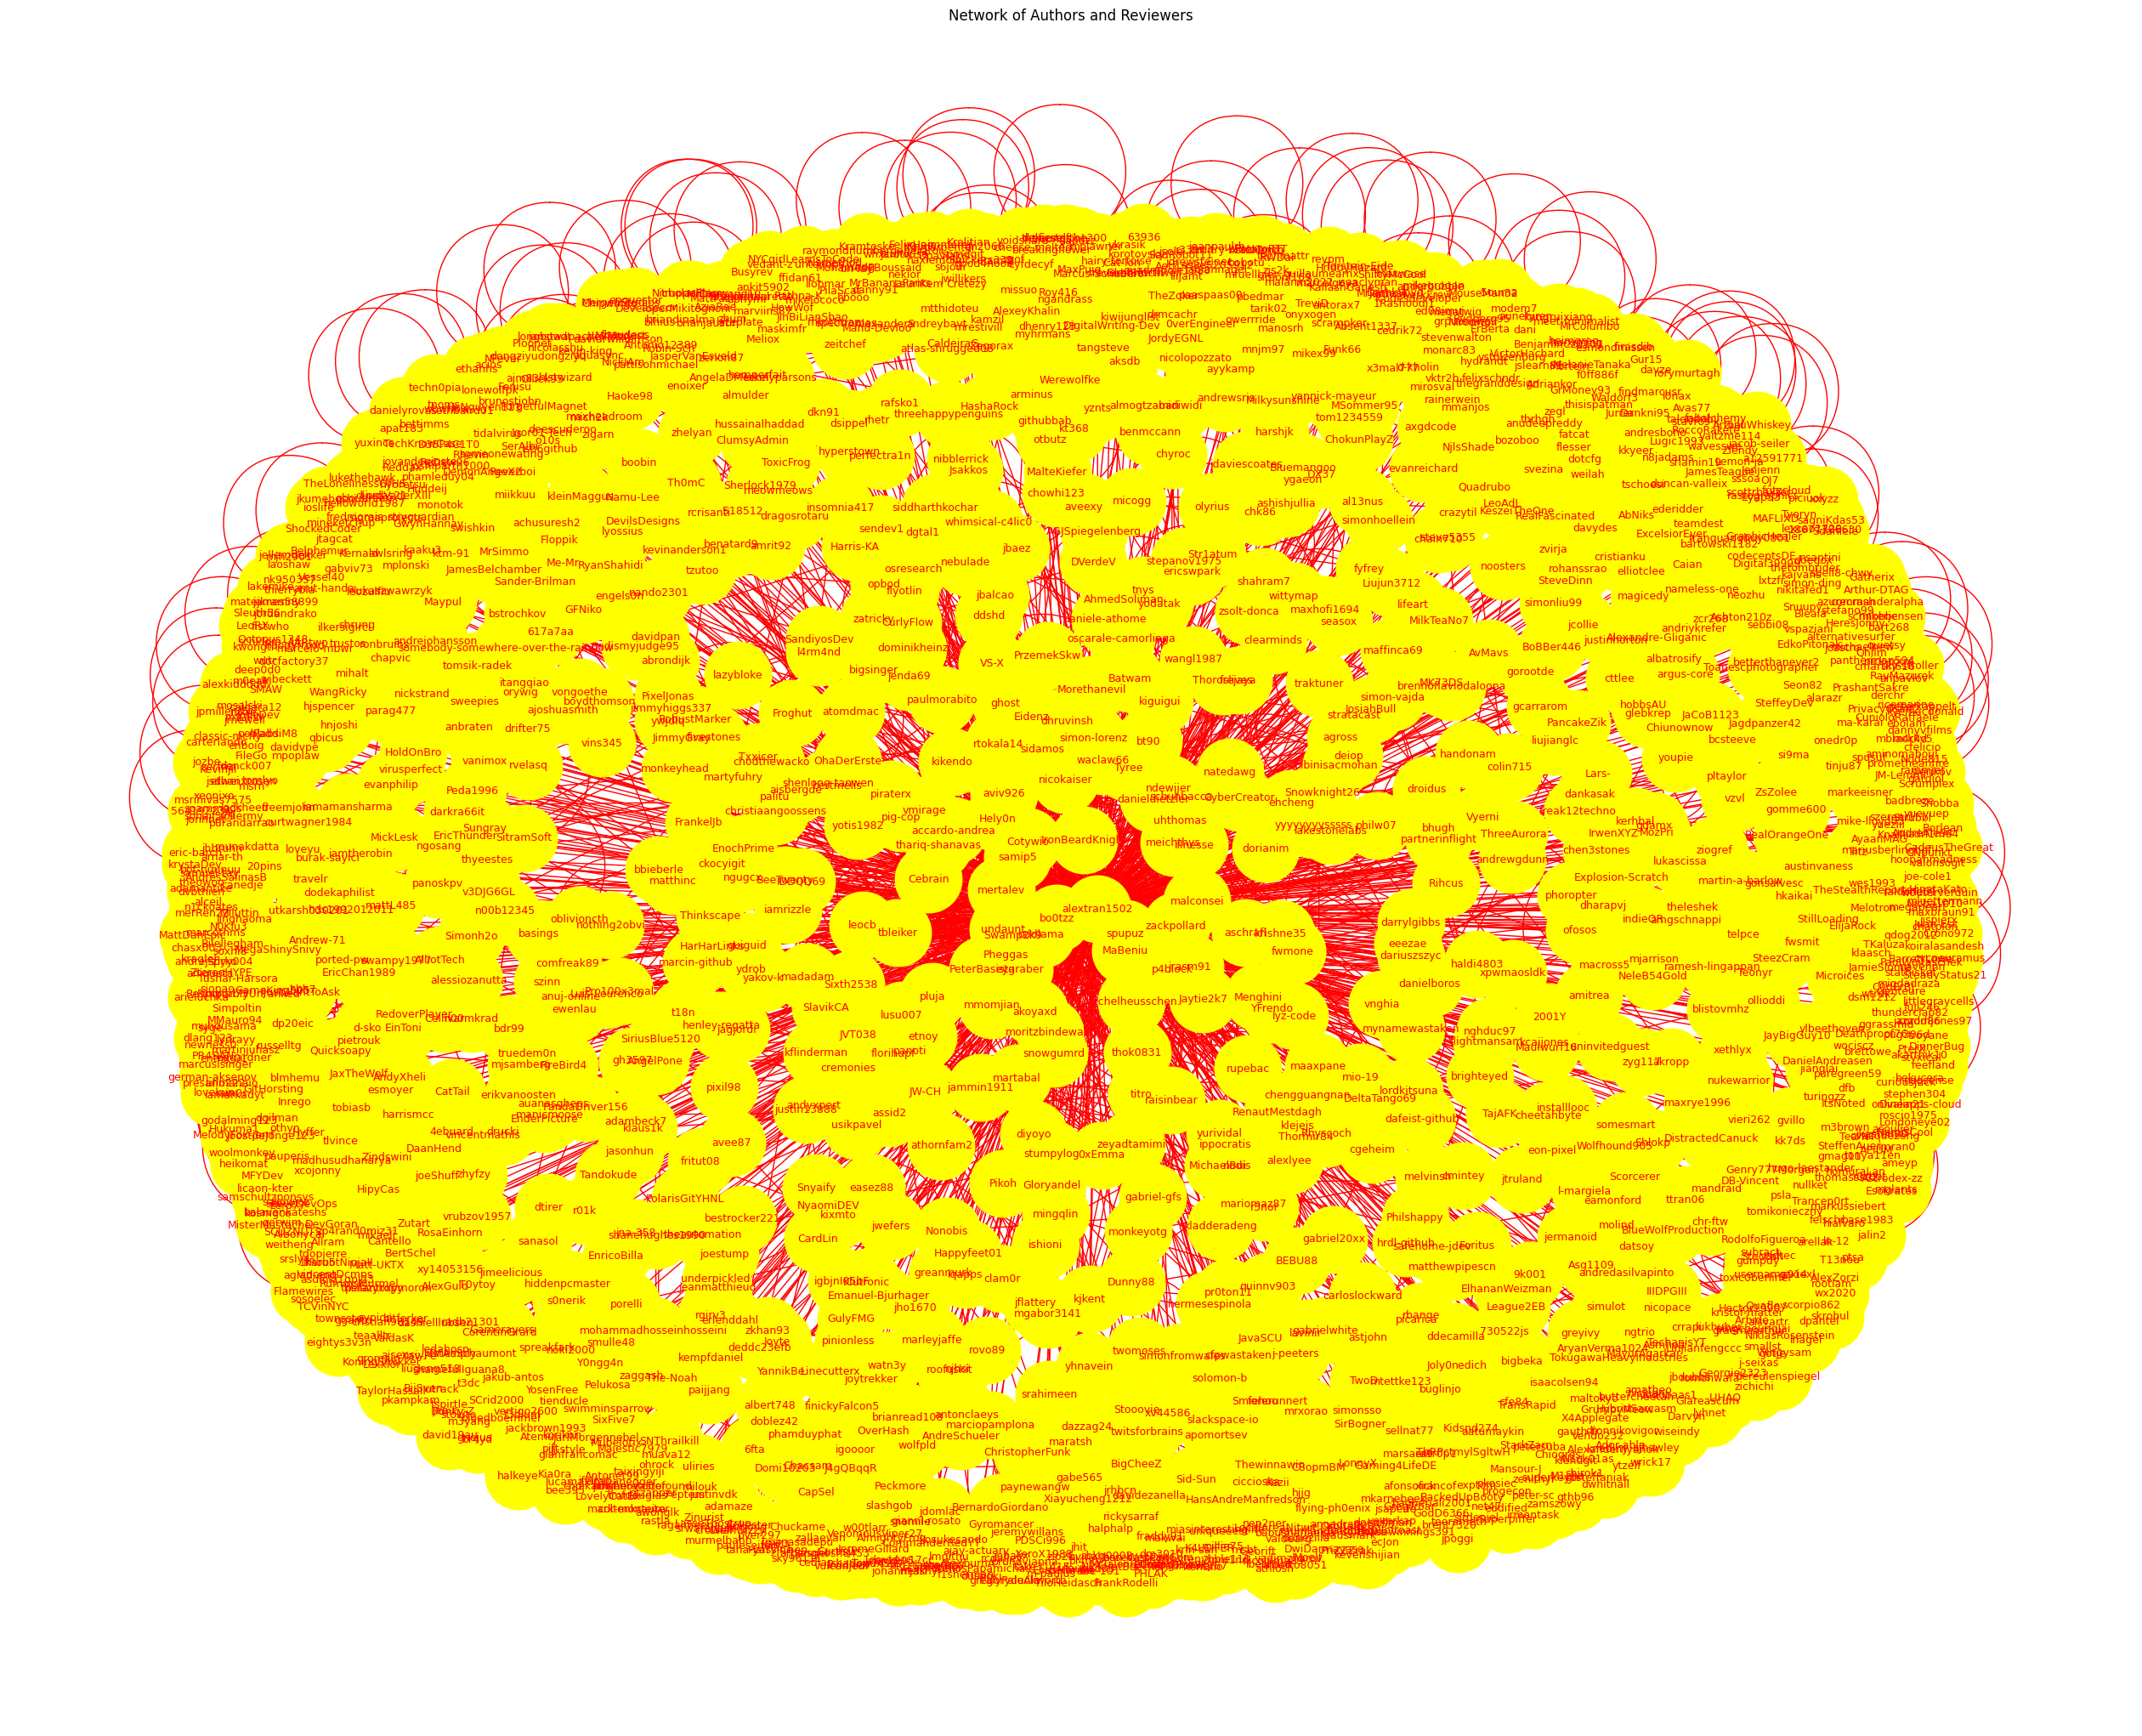

In [132]:
pos2 = nx.spring_layout(G2, k=0.3)
plt.figure(figsize=(25, 20))
nx.draw(G2,pos2, with_labels=True, node_size=3200, font_size=9, font_color='red', node_color='yellow', edge_color='red')
plt.title('Network of Authors and Reviewers')
plt.show()